In [14]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualizations

np.random.seed(29)


# Generating Random Numbers with Numpy

The numpy.random module provides a number of functions for generating random numbers.

- np.random.choice: selects random options from a list
- np.random.uniform: generates numbers between a given lower and upper bound
- np.random.random: generates numbers between 0 and 1
- np.random.randn: generates numbers from the standard normal distribution
- np.random.normal: generates numbers from a normal distribution with a specified mean and standard deviation
- Example Problems

## Carnival Dice Rolls

You are at a carnival and come across a person in a booth offering you a game of "chance" (as people in booths at carnivals tend to do).

You pay 5 dollars and roll 3 dice. If the sum of the dice rolls is greater than 12, you get 15 dollars. If it's less than or equal to 12, you get nothing.

Assuming the dice are fair, should you play this game? How would this change if the winning condition was a sum greater than or equal to 12?

To simulate this problem, we'll write the python code to simulate the scenario described above, then repeat it a large amount of times.

One way we can keep track of all the simulations is to use a 2-dimensional matrix. We can create a matrix where each row represents one "trial". Each row will have 3 columns, representing the 3 dice rolls.

In [15]:
n_trials = nrows = 10_000
n_dice = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
rolls


array([[6, 4, 5],
       [6, 3, 1],
       [1, 2, 2],
       ...,
       [6, 2, 1],
       [3, 4, 3],
       [4, 2, 4]])

Here we used the choice function to randomly select an element out of the list of the number 1-6, effectively simulating a dice roll. The second argument supplied to choice is the total number of dice to roll. Once we have generated all the dice rolls, we use the .reshape method to create our matrix with 3 columns and 10,000 rows.

Now that we have all of the simulated dice rolls, we want to get the sum of the dice rolls for each trial. To do this, we can use the .sum function and specify that we want the sum of every row (as opposed to the sum of all the numbers, or the sum by column) with the axis key word argument.

In [16]:
sums_by_trial = rolls.sum(axis=1)
sums_by_trial


array([15, 10,  5, ...,  9, 10, 10])

Let's pause here for a minute and visualize the data we have:

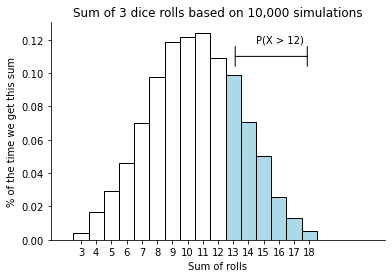

In [17]:
viz.simulation_example1(sums_by_trial)


The area shaded in lightblue represents our chance of winning, that is, the number of times that the sum of 3 dice rolls is greater than 12.

We can now convert each value in our array to a boolean value indicating whether or not we won:

In [18]:
wins = sums_by_trial > 12
wins


array([ True, False, False, ..., False, False, False])

In [19]:
# how many times did we win
wins.sum()

2633

In [20]:
# how many times did we play?
wins.shape

(10000,)


To calculate an overall win rate, we can treat each win as a 1 and each loss as 0, then take the average of the array:

In [21]:
win_rate = wins.astype(int).mean()
win_rate


0.2633

Now that we know our win rate, we can calculate the expected profit:

In [22]:
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

-1.0505000000000004

So we would expect, based on our simulations, on average, to lose a little over a dollar everytime we play this game.

To answer the last part of the question, we can recalculate our win rate based on the sums being greater than or equal to 12:

In [23]:
wins = sums_by_trial >= 12
win_rate = wins.astype(int).mean()
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

0.5860000000000003

if our win con changes to the sum being greater or equal to 12, then, based on our simulations, on average, we expect to walk away with sub .50c

# No rest or relaxation
There is a 30% chance that my son takes a nap on any given weekend day. What is the chance that he takes a nap at least one day this weekend? No nap at all?

Setup:

Non-conditional -- if there is a nap one day, it does not affect a nap the next day. They are completely independent.

In [24]:
# 10 to the 5th is 10,000 weekends with a 30% chance of something happening. 
# ndays = weekdays
p_nap = .3
ndays = ncols = 2
n_simulated_weekends = nrows = 10**5

To simulate the results from many weekends, we'll create a 2 x 10,000 matrix, with 2 being the number of days in a weekend and 10,000 being the number of simulations we want to run.

To determine whether or not a nap is taken on a given day, we'll generate a random number between 0 and 1, and say that it is a nap if it is less than our probability of taking a nap.

In [27]:
#　this data takes the nrows and ncols from the setup to randomly generate naps
# this is indicated by being above .3
data = np.random.random((nrows, ncols))
data

array([[0.46386823, 0.21271797],
       [0.90376703, 0.62569613],
       [0.97665921, 0.4493392 ],
       ...,
       [0.49547778, 0.69932358],
       [0.53464724, 0.26440082],
       [0.40316768, 0.71504871]])

In [28]:
# Now we are generating the true or false booleans
naps = data < p_nap
naps

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False,  True],
       [False, False]])

Now that we have each day as either true or false, we can take the sum of each row to find the total number of naps for the weekend. When we sum an array of boolean values, numpy will treat True as 1 and False as 0.

In [29]:
naps.sum(axis=1)

array([1, 0, 0, ..., 0, 1, 0])

In [33]:
# evaluating our array
np.unique(naps)

array([False,  True])

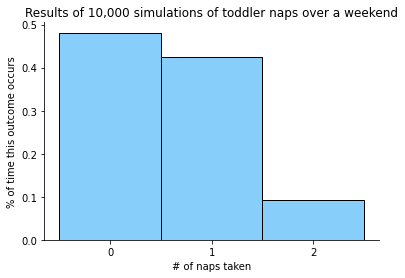

In [30]:
viz.simulation_example2(naps)

In [34]:
(naps.sum(axis=1) >= 1).mean()

0.5189

In [35]:
(naps.sum(axis=1) == 0).mean()

0.4811

# One With Dataframes

Let's take a look at one more problem:

What is the probability of getting at least one 3 in 3 dice rolls?

To simulate this, we'll use a similar strategy to how we modeled the dice rolls in the previous example, but this time, we'll store the results in a pandas dataframe so that we can apply a lambda function that will check to see if one of the rolls was a 3.

In [44]:
n_simulations = nrows = 10**5
n_dice_rolled = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], nrows * ncols).reshape(nrows, ncols)

rolls = pd.DataFrame(rolls)
rolls["has_at_least_one_three"] = rolls.apply(lambda row: 3 in row.values, axis=1)
rolls[rolls.has_at_least_one_three]

,0,1,2,has_at_least_one_three
1,3,4,5,True
4,6,1,3,True
5,2,5,3,True
6,1,3,3,True
8,4,3,6,True
...,...,...,...,...
99991,3,3,5,True
99992,2,3,6,True
99996,1,3,6,True
99997,3,3,5,True


In [45]:
rolls["has_at_least_one_three"] = rolls.apply(lambda row: 3 in row.values, axis=1)
rolls.has_at_least_one_three.mean()

0.42276

Let's break down what's going on here:

- First we assign values for the number of rows and columns we are going to use

- Next we create the rolls variable that holds a 3 x 10,000 matrix where each element is a randomly chosen number from 1 to 6

- Lastly we create a dataframe from the rolls
    - pd.DataFrame(rolls) converts our 2d numpy matrix to a pandas DataFrame

    - .apply(... applies a function to each row in our dataframe, because we specified axis=1, the function will be called with each row as it's argument. The body of the function checks to see if the value 3 is in the values of the row, and will return either True or False
    
    - .mean() takes our resulting series of boolean values, and treats True as 1 and False as 0, to give us the average rate of Trues, in this case, the simulated probability of getting a 3 in 3 dice rolls.